# **Lab One: Visualization and Data Preprocessing**

*Contributors:* Balaji Avvaru, Joshua Eysenbach, Vijay Kaniti, Daniel Turner

## **Business Understanding**

This analysis uses a dataset categorizing patients with a cardiovascular disease (CVD) diagnosis.  It contains a collection of 11 attributes that were gathered with the intention of trying to identify potential characteristics of individuals that correlate with heart disease. The primary goal of this analysis is to explore the data through statistical summaries and visualization to elucidate any trends that will be useful for building a prediction model for classifying a patient as having a CVD diagnosis or not.

This dataset was procured from Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) but it is unclear from where the original data originates. However, the features are described well enough to understand what each of them represents. In a practical "real-world" setting, verifying the source of this data and scrutinizing the methods of its collection would be a vital part of the analysis, but for the purposes of our academic interests in data visualization and eventual prediction modelling, this level of validity is inconsequential as long as the data has realistic characteristics and application.

Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels (Atherosclerosis) that can lead to a heart attack, chest pain (angina) or stroke. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias), congenital heart defects, and rheumatic heart disease. Four out of five CVD deaths are due to heart attacks and strokes. (https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118)

The goal of any prediction algorithm using this data is to determine if any of these attributes or combination of them can predict a cardiovascular disease diagnosis. These predicition models could provide valuable insight into what conditions or behaviors might be correlated with heart disease and could be used in aiding diagnosis or helping to mitigate the disease through understanding its possible causes. Many of the attributes collected are based on long standing suppositions of conditions or behaviors associated with heart disease like high cholesterol, smoking, or alcohol consumption. This analysis and subsequent prediction modeling can hopefully identify if any of these are more associated with (or even perhaps falsely attributed to) a diagnosis.

The effectiveness of a prediction model for classifying patients could be measured in several ways depending on the implementation. For example, the intent of the model could be to identify individuals likely to be diagnosed with cardiovascular disease so they can be given an objective reason to make behavioral changes to reduce their chances of a future diagnosis. In this case, maximizing sensitivity at the expense of accuracy and specificity might be the best option because there would be few downsides to making false positive classifications. AUC (Area under the curve; Receiver Operating Characteristic) could also be an effective metric under this principle as it measures the ability of the model to predict a higher score for positive examples. On the other hand, if something like high cholesterol was found to be a highly significant predictor and there was a decision to be made about prescribing a drug that could have side effects for the patient, accuracy and a more balanced sensitivity and specificity might be more important as false positives become more of a concern. For reasons like these, a few different prediction models might be warranted for different specific uses. 



## **Data Understanding**

### Data Meaning and Attribute Types

The features included are described on the Kaggle page for this data as being separable into three categories:
* *Objective*: Factual initial information about the patient;
* *Examination*: Information resulting from medical examination;
* *Subjective*: Information given by the patient.

Distinctions between the different attributes are paramount to interpreting and qualifying results of analysis and modeling of this data as they can represent varying degrees of validity and potential biases, so it is important that we keep this in mind as we explore the data and eventually make any recommendations. For example, we would likely assume blood pressure measurements will be reasonably accurate as they were taken by a trained health professional, but should be wary of a patient's proclivity to be honest when asked whether they are a regular smoker or drinker.

The dataset acquired from Kaggle is stored for our use on Github (https://github.com/jteysen/MSDS-7331-Machine-Learning-I/tree/master/Code). The code for importing the data is combined with the inital loading of various analysis and visualization packages below. 

In [178]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [179]:
df = pd.read_csv("https://raw.githubusercontent.com/jteysen/MSDS-7331-Machine-Learning-I/master/Data/cardio_train.csv")

The attributes included in the dataset are outlined below per their descriptions on the Kaggle page.

|Attribute Name | Category | Description |
|---------------|----------|-------------|
|age | Objective | Age of the Patient (days) |
|height | Objective | Height of the Patient (cm) |
|weight | Objective | Weight of the Patient (kg) |
|gender | Objective | Gender of the Patient (1:M, 2:F)|
|ap_hi | Examination | Systolic blood pressure (mmHg)|
|ap_lo | Examination | Diastolic blood pressure (mmHg)|
|cholesterol | Examination | Cholesterol level -  1: normal, 2: above normal, 3: well above normal |
|gluc | Examination | Glucose level - 1: normal, 2: above normal, 3: well above normal |
|smoke | Subjective | Patient does (1) or does not (0) describe themselves as a smoker |
|alco | Subjective | Patient does (1) or does not (0) regularly drink alcohol |
|active | Subjective | Patient does (1) or does not (0) regularly exercise |
|cardio | Target Variable | Diagnosis of presence (1) or absence (0) of cardiovascular disease |

Most of these need little explanation, but we researched the attributes in the *Examination* category for a more in-depth understanding of their measurement and their known implications on cardiovascular disease and general heart health.

Blood Pressure is typically measured using an inflatable cuff with a gauge that meaures mmHg (pressure exerted by 1 mm high column of mercury). Measurements are taken that represent the maximum pressure exerted on arteries when the heart beats (systolic - higher) and between heart beats (diastolic - lower). The condition where either or both of these measurements is high called Hypertension, and this condition has been linked to cardiovascular disease. The American Heart Association outlines blood pressure levels by severity.

In [180]:
# https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
Image(url="https://raw.githubusercontent.com/jteysen/MSDS-7331-Machine-Learning-I/master/Data/bp.jpg", width=600)

Cholesterol is a type of fat found in blood that is both produced by the body and accumulated by ingesting foods with saturated fats. It is typically measured with a blood test and that gauges the saturation (in mg per dL of blood) of both high density and low density (considered to be the dangerous form in high concentrations) lipids. This dataset does not specifically detail what measurements represent the three levels of *normal*, *above normal*, and *well above normal*, but the American Heart Association claims the measurements considered normal and healthy vary with age, so the use of these 3 levels simplifies the use of cholesterol in any analysis and model building. 

Blood Glucose level, or the concentration of glucose in the bloodstream (also measured in mg/dL), is another attribute that has been recorded in this data with three levels. High glucose can be a sign of diabetes, another condition commonly associated with heart disease. An important consideration when analyzing glucose level is that its measurement can be highly variable as it depends heavily on how soon after a meal the test is taken. Since the severity of the glucose measurement is contigent on when the patient has last eaten, it is helpful that this data has normalized it to three levels, but we must be wary of potential inconsistencies we may not be privy to and consider that a doctor cannot be 100% sure that a patient has fasted as directed or appropriately informed the doctor of their last meal. The chart below based on guidelines from the American Diabetes Association illustrates the vast differences between expect blood sugar measurements depending on known cases of diabetes and time after eating.

In [181]:
# https://www.diabetesselfmanagement.com/blog/what-is-a-normal-blood-sugar-level
Image(url="https://raw.githubusercontent.com/jteysen/MSDS-7331-Machine-Learning-I/master/Data/bsugar.JPG", width=600)

### Data Quality Verification

#### Initial Import Check

We can verify that the import was successful and get a preview of our data. The *.info()* command is used to view the current data type of each attribute.

In [182]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [183]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


The *.info()* command is used to view the current data type of each attribute.

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


We can see that there are 70,000 observations and 13 total columns. Taking into account the ID field and the target variable (cardio), there are 11 attributes that could be used as predictor variables. Note that there are no missing values in the data as there are 70,000 non-null values for all attributes. This also indicates (along with what we saw from the *.head()* command) that since all attributes are integers (or floats) that the categorical information is already in a numeric coded form. Based on the attribute descriptions, we can group them by categorical and continuous variables for easier use with analysis tools.

In [185]:
# Continuous features
cont_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
# Categorical features
cat_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

Since the ID field is simply the ordered numbering of all of the observations, it is not useful to us so we will drop it from our data frame. This will also help to reduce the size of any pairwise comparisons.

In [186]:
df.drop(['id'], inplace=True, axis=1)

#### Initial Simple Statistics

We first run the simple statistics of the continuous variables to get some basic ideas about the data and check for reasonability of the observations. 

In [187]:
df[cont_features].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


The height and weight means are reasonable and the American Heart Association considers *normal* healthy blood pressure measurements to be 120/80 so their means appear reasonable as well. However, we can already identify obvious outlier issues for blood presssure by some of the impossible min and max values shown that go from negative to absurdly high, and some of the other extreme values (like the highly unlikely max for height of over eight feet) will need to be examined more closely. 

Interestingly, the medians and lower quartile for blood pressure are exactly 120/80. The fact that the medians are the same as the lower quartiles suggests that many subjects will be right at this "normal" range for blood pressure.

We also see that the scale of age in days is cumbersome and we will be able to make sense of ages more quickly if converted to years. The age range of 29 to 65 with a mean of 53 years is a fairly narrow scope; the prevalence of CVD is likely low amoung individuals younger than 29 but we could be missing a large component of the effects of age on CVD without data on patients older than 65.

#### Duplicate Records Check

The records are checked to see if any are exact duplicates. For this data, checking for duplicates could tell us how many patients have the exact same data but doesn't necessarily reveal if the records are erroneous duplicates or not. The ID field was removed before this operation since it appears arbitrarily built, but we can still check to see if the number of duplicates is reasonable. In  a sample of 70,000, it is not impossible for there to be individuals with the same information when the data is relatively common with only 11 statistics.

In [188]:
duplicate_observations = df[df.duplicated(keep='first')]

print("\nThere are {0} duplicated entries in the dataset!\n".format(len(duplicate_observations)))

print("Duplicate Rows based on all columns are :\n")
print(duplicate_observations)


There are 24 duplicated entries in the dataset!

Duplicate Rows based on all columns are :

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10562  20495       1     165    70.0    120     80            1     1      0   
21784  16793       1     165    68.0    120     80            1     1      0   
38505  18988       1     164    65.0    120     80            1     1      0   
40365  14552       1     158    64.0    120     80            1     1      0   
42450  18353       1     169    67.0    120     80            1     1      0   
44653  16937       2     170    70.0    120     80            1     1      0   
45125  21280       1     165    65.0    120     80            1     1      0   
45748  22077       1     175    69.0    120     80            1     1      0   
45810  21230       1     164    62.0    120     80            1     1      0   
48917  21945       1     165    60.0    120     80            1     1      0   
50432  17493       2     16

All of the duplicates shown are for individuals very near the average or medians for the different attributes, so having 24 with the same attributes is entirely possible.

#### Outlier Detection

As we saw in the table of basic statistics, there are definitely some outliers in our data. We can view outliers using box plots and visualize the distributions of continous features with violin plots. A side-by-side comparison of violin and box plots is a great way to view the frequency of observations across the distributions while also seeing the quartiles and outliers. As determined from the stat table, we will first convert age to years.

In [189]:
#convert the age to number of years instead of number of days 
df['age_years'] = (df['age'] / 365).round().astype('int')
# drop the feature 'age'
df.drop('age', axis=1, inplace=True)
# New Continuous features
cont_features = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']

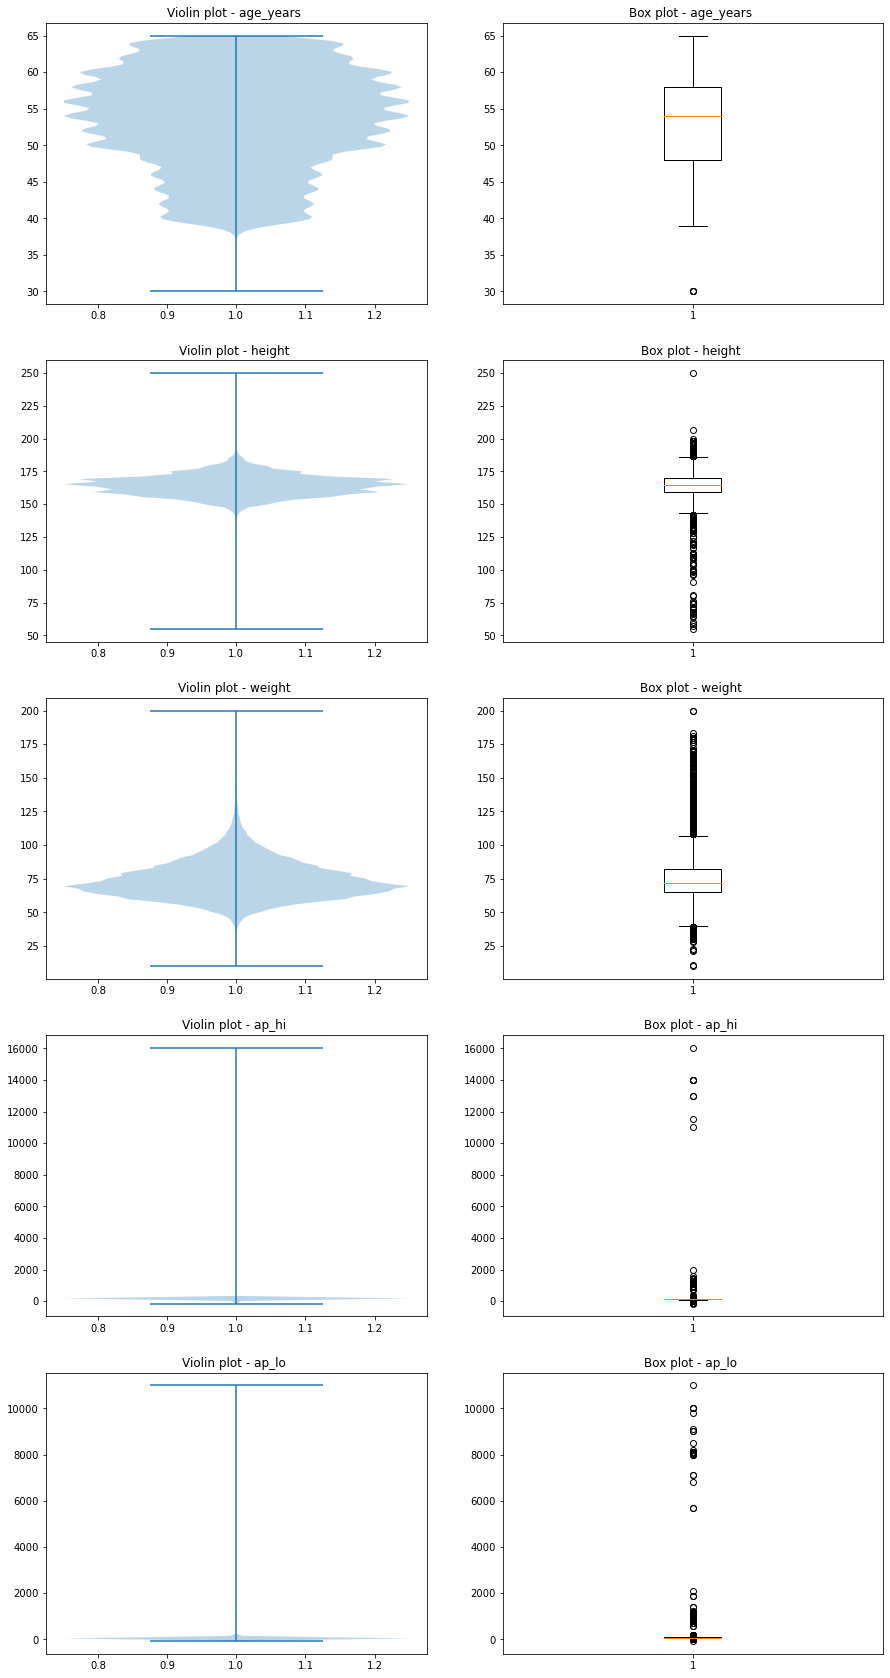

In [190]:
# Box and voilin plots of continuous features
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 30))
column = 0

def plot(axrow, x, y):    
    axrow[0].violinplot(x)
    axrow[0].set_title('Violin plot - {} '.format(cont_features[y]))
    
    axrow[1].boxplot(x)
    axrow[1].set_title('Box plot - {} '.format(cont_features[y]))
    
for row in axes:
    x = df[cont_features[column]]
    plot(row, x, column)    
    column = column+1

For age, we see that the lone 29 year old subject is a statistical outlier but not an unreasonable possibilty, so we'll leave it. The other continuous attributes appear to have wide spreads that make it difficult to discern where we should cut off outlying data. It will be difficult based on what we have to balance the removal of data based on being statistical outliers vs being just outlandish. We can't even see the distributions for blood pressure at the moment due to extremely high outliers.

From the simple statistics, box/violin plots and the heart.org Blood Pressure chart, we can see that there are some outliers (likely incorrectly entered) values for the features *Systolic blood pressure* and *Diastolic blood pressure*. We remove the observations with extremely abnormal Systolic blood pressure and Diastolic blood pressure observations based on reasonable expections derived from American Heart Association information.

In [191]:
df = df[(df["ap_lo"] < 140) & (df["ap_lo"] > 20)]
df = df[(df["ap_hi"] < 220) & (df["ap_hi"] > 40)]

print(df[['ap_lo', 'ap_hi']].describe())

              ap_lo         ap_hi
count  68698.000000  68698.000000
mean      81.305395    126.572753
std        9.439463     16.595382
min       30.000000     60.000000
25%       80.000000    120.000000
50%       80.000000    120.000000
75%       90.000000    140.000000
max      135.000000    215.000000


We also know it is impossible to have a diastolic pressure that is higher than a systolic pressure, and because the minimums and maximums of ap_hi and ap_lo overlap, it is worth checking to see if this anomaly is present anywhere in the data. 

In [192]:
len(df.query('ap_lo > ap_hi'))

64

There are 64 observations where ap_lo is greater than ap_hi. That's few enough that we should view them all to see what could have happened.

In [193]:
pd.set_option('display.max_rows', 65)
df.query('ap_lo > ap_hi')

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
636,2,169,68.0,70,110,1,1,0,0,1,0,56
3447,2,180,80.0,80,125,3,3,1,1,1,1,55
3623,1,160,83.0,80,120,1,1,0,0,1,0,60
4830,2,159,68.0,70,100,1,1,0,0,0,0,46
5446,1,165,110.0,95,130,1,1,0,1,1,1,52
5760,1,150,66.0,80,120,1,1,0,0,1,0,43
8422,2,162,60.0,80,130,1,1,0,0,0,1,63
8947,2,172,102.0,80,130,1,1,0,1,1,0,47
9010,2,176,82.0,90,130,3,3,0,0,1,1,56
9452,2,172,71.0,80,120,1,1,0,0,1,0,44


Viewing the records where ap_lo > ap_hi, it appears we could assume that all of these were accidentally entered in reverse, and simply swap the values rather than delete these observations due to the mistakes.

In [194]:
# swap values for records where ap_lo > ap_hi
temp = df['ap_lo'] > df['ap_hi']
df.loc[temp, ['ap_lo','ap_hi']] = df.loc[temp, ['ap_hi','ap_lo']].values
# Check that swap worked
len(df.query('ap_lo > ap_hi'))

0

For the height attribute, we will assume the 250 cm giant is an anomaly and remove that observation from the data. The unreasonably short records could be from entry errors stemming from accidental unit confusion (we know these aren't just children because the min age is 29). For example, the minimum of 55 cm could have been an erroneous entry for 5ft 5 inches. We will use the cutoff of 120 cm (approx 4 ft) for the lower end of heights. The same goes for the weights; the very low values are not realistic, but the max of 200 kg is still within the realm of possibility. We can try 40 kg as a cutoff. These cutoffs are somewhat arbitrary, but designed with the desire to minimize both the the number of extreme values and number of records removed.

In [195]:
df = df[(df["height"] < 250)]
df = df[(df["height"] > 120)]
print(df[['height']].describe())

             height
count  68615.000000
mean     164.433520
std        7.856655
min      122.000000
25%      159.000000
50%      165.000000
75%      170.000000
max      207.000000


In [196]:
df = df[(df["weight"] > 40)]
print(df[['weight']].describe())

             weight
count  68525.000000
mean      74.151076
std       14.240436
min       41.000000
25%       65.000000
50%       72.000000
75%       82.000000
max      200.000000


Taking a look at the 200 kg weight observation:

In [197]:
print(df.loc[df['weight'] == 200])

       gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
435         1     186   200.0    130     70            1     1      0     0   
50413       2     180   200.0    150     90            1     1      0     0   

       active  cardio  age_years  
435         0       0         46  
50413       1       1         41  


There are actually 2 observations with 200 kg; they are both for individuals around 6 to 6.2 ft tall. While this isn't impossible, these subjects are so far away from the rest of the data that they have a chance of skewing any models that might use this variable, so we'll remove them.

In [198]:
df = df[(df["weight"] < 200)]
print(df[['weight']].describe())

             weight
count  68523.000000
mean      74.147402
std       14.224404
min       41.000000
25%       65.000000
50%       72.000000
75%       82.000000
max      183.000000


### Statistics and Visualization of Modified Continuous Variables

After making adjustments for extreme outliers, we can re-run the simple statistics, box plots and violin plots to see how the distributions changed.

In [199]:
df[cont_features].describe()

,age_years,height,weight,ap_hi,ap_lo
count,68523.000000,68523.000000,68523.000000,68523.000000,68523.000000
mean,53.326752,164.449907,74.147402,126.627439,81.280154
std,6.766015,7.840665,14.224404,16.529518,9.361010
min,30.000000,122.000000,41.000000,60.000000,30.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,65.000000,207.000000,183.000000,215.000000,130.000000


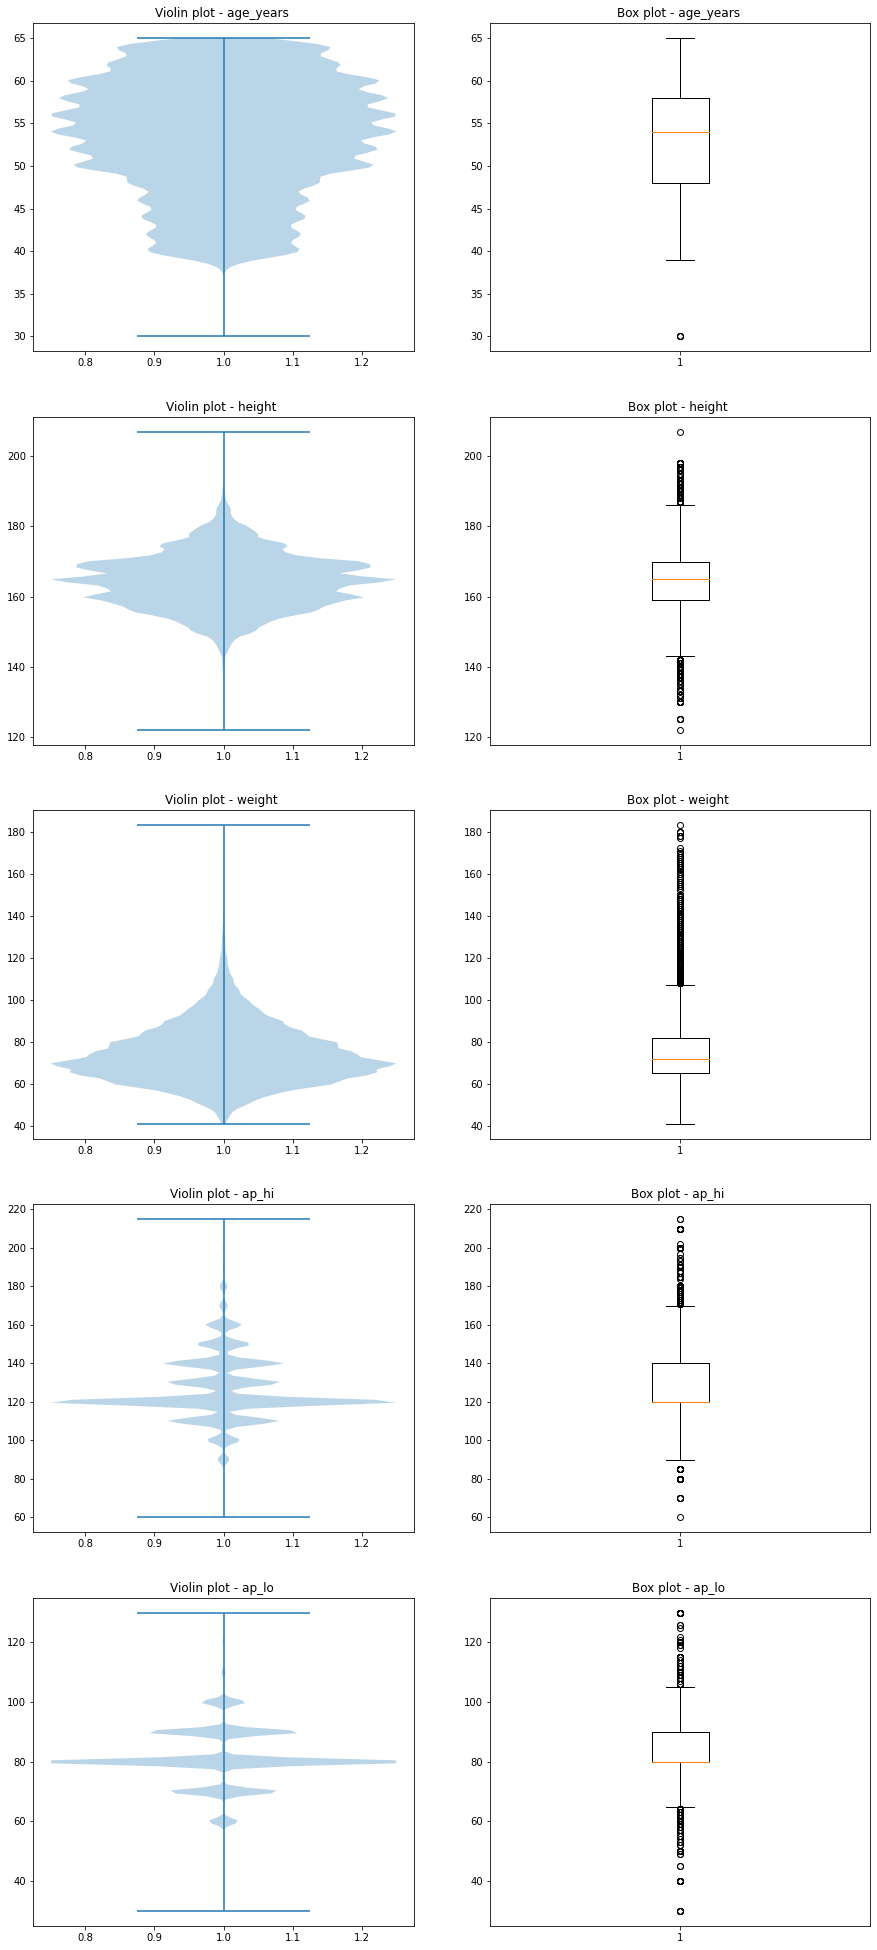

In [200]:
# Box and voilin plots of continuous features after removing the outliers


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 35))
column = 0

def plot(axrow, x, y):    
    axrow[0].violinplot(x)
    axrow[0].set_title('Violin plot - {} '.format(cont_features[y]))
    
    axrow[1].boxplot(x)
    axrow[1].set_title('Box plot - {} '.format(cont_features[y]))
    
for row in axes:
    x = df[cont_features[column]]
    plot(row, x, column)    
    column = column+1

After adjustments, the size of the set is reduced by only about 2%. The means of each of the continuous attributes did not change drastically, except for the blood pressure values due to the extremity of the outliers removed. Their standard deviations decreased heavily as well, reducing the spread of the data.

We can view the distributions on the violin and box plots much more clearly after applying the limits to our data. The violin plots in particular are very useful for determining the true distributions of each of these features. There are obviously still outliers present on the box plots by way of standard designation based on quartiles, but these are expected in a normal population spread of the attributes we looking at.

The distribution of ages shows that most of the subjects are around the mean of 53 years old and the number of subjects observed drops off fairly quickly for ages less than 50. The height and weight distributions appear as expected, with a normal distribution of heights and somewhat skewed for weights with the plots stretched by the heavier subjects.

The blood pressure plots are interesting in that their distributions have distinct peaks instead of gradual spreads. The diastolic pressure especially has a multi modal violin plot with almost complete separations between groups. This could indicate that the blood pressure measurements are reported in this data with a low level of precision. This would not be unexpected if blood pressure was tested with the traditional method of using a stethoscope and manually inflated cuff, as the points of measurement are somewhat subjective due to a medical professional listening to heart beats to determine when to read a gauge. It makes sense that many of the observations could be rounded to the nearest 5 or 10 mmHg.

### Visualization of Categorical Variables

This data has 6 categorical attributes in addition to the target variable of CVD diagnosis. As shown in the attribute description table, gender, three subjective features, and the target are binary while Cholesterol and Glucose each have 3 ordinal levels. 

The first thing we would like to know is how well balanced our target variable is. If there are far more observations either with or without a CVD diagnosis, we will have to take that into consideration later when we form training and test sets for model building; an unbalanced response variable can cause issues with computing model parameters and correctly assessing model performance.

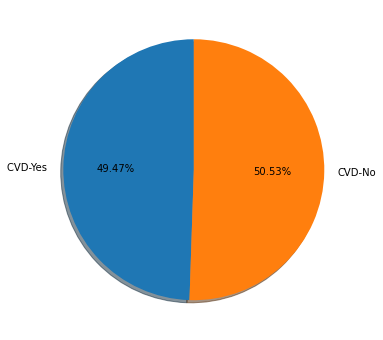

In [201]:
# Check whether dataset is balanced or not with respect to target variable 
disease = len(df[df['cardio'] == 1])
non_disease = len(df[df['cardio'] == 0])
plt.pie(x=[disease, non_disease], explode=(0, 0), labels=['CVD-Yes ', 'CVD-No'],autopct='%1.2f%%' ,
        shadow=True, startangle=90)
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.show()

The data (even after removal of extreme outliers) is near perfectly balanced for positive and negative CVD diagnoses.

For the other categorical features, the only information we are interested in as far as each of them on their own is the count of observations in each level of each attribute. Some simple histograms are best for quickly viewing the relative differences in level counts.

<AxesSubplot:xlabel='active', ylabel='count'>

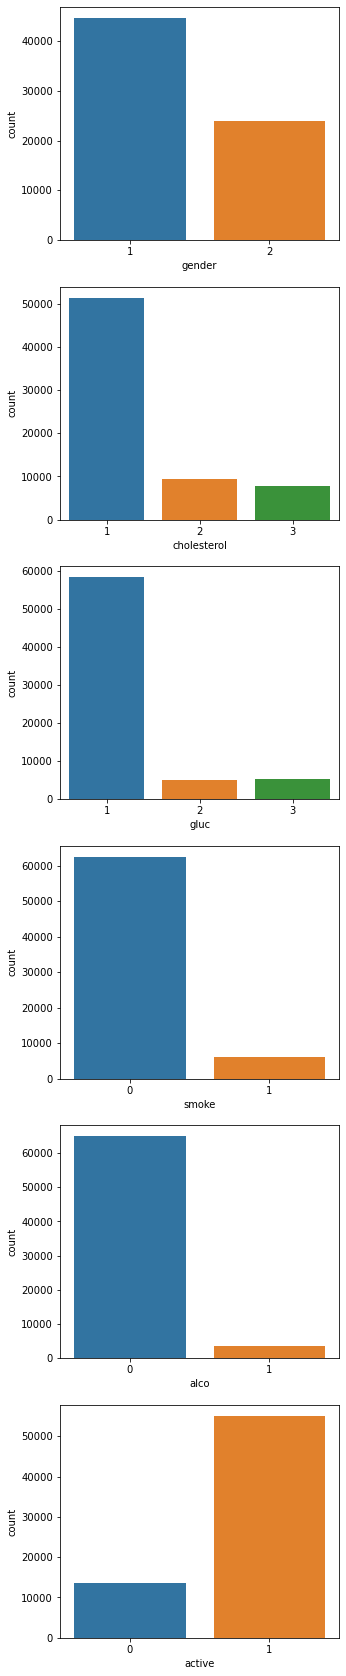

In [202]:
fig, axes = plt.subplots(6, figsize=(5,30))
g = fig.add_gridspec(2, 2)

sns.countplot(x='gender', data=df, ax=axes[0])
sns.countplot(x='cholesterol', data=df, ax=axes[1])
sns.countplot(x='gluc', data=df, ax=axes[2])
sns.countplot(x='smoke', data=df, ax=axes[3])
sns.countplot(x='alco', data=df, ax=axes[4])
sns.countplot(x='active', data=df, ax=axes[5])

We notice right away that the gender of the subjects in this dataset are not balanced, as males (1) are significantly over-represented. The other categorical attributes each have one dominant level as well. Interestingly, despite 50% of the subjects being diagnosed with CVD, they are heavily weighted toward the levels generally considered "healthy" or "normal" for these attributes. The vast majority of the subjets have low levels of cholesterol and glucose, do not regularly drink alcohol or smoke, and consider themselves "active". As these measures depend on patient self reporting, they may, of course, be misleading.

### Exploring Relationships Between Predictor Attributes

After getting our data cleaned up and looking at the attributes on their own, we want to explore how they could be related to each other. We can use pairwise scatter plots to visualize correlations between the continuous variables first. We can add in a color coding for *cardio* as well just to see as we go if any features pop out with noticably different correlations for a CVD diagnosis.

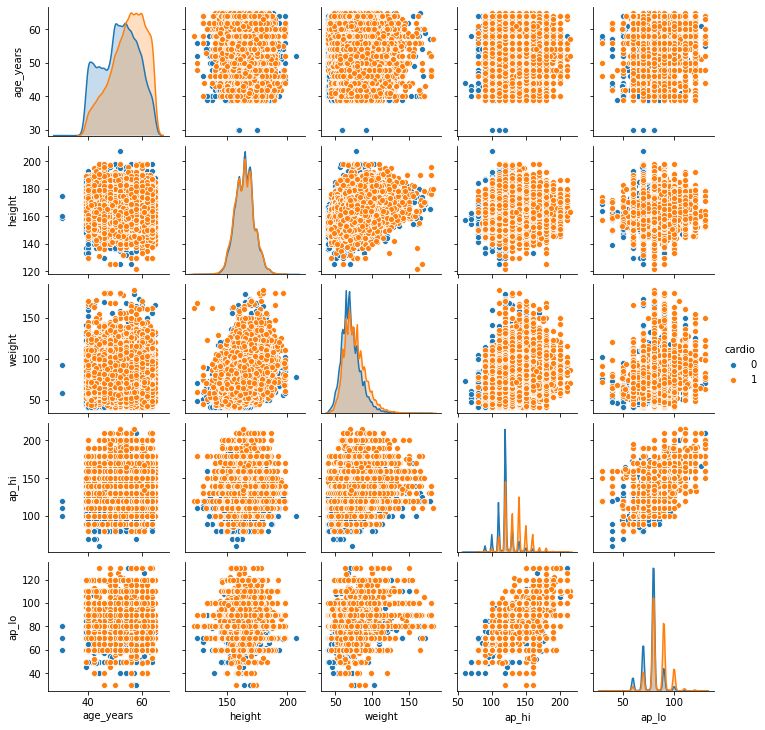

In [203]:
# pairwise plots of cont features
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.pairplot(df, vars = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo'], hue='cardio', height=2, diag_kws={'bw':'1.0'})

As there are many observations, its not easy to see many patterns or relationships between features. We can see some evidence of expected correlations like a positive trend between height and weight and between systolic and diastolic blood pressure. There does appear to be some positive correlation between weight and blood pressure. Not much is revealed yet by the color coding of CVD diagnosis, except in the plots of each variable that show the 2 outcomes split, where we can see a bit of separation in age and blood pressure. We'll explore those in more detail later.

A heatmap of correlations is useful for quantifying and visualizing relationships between attributes and we can add in the coded categorical variables to this graphic as well.

<AxesSubplot:>

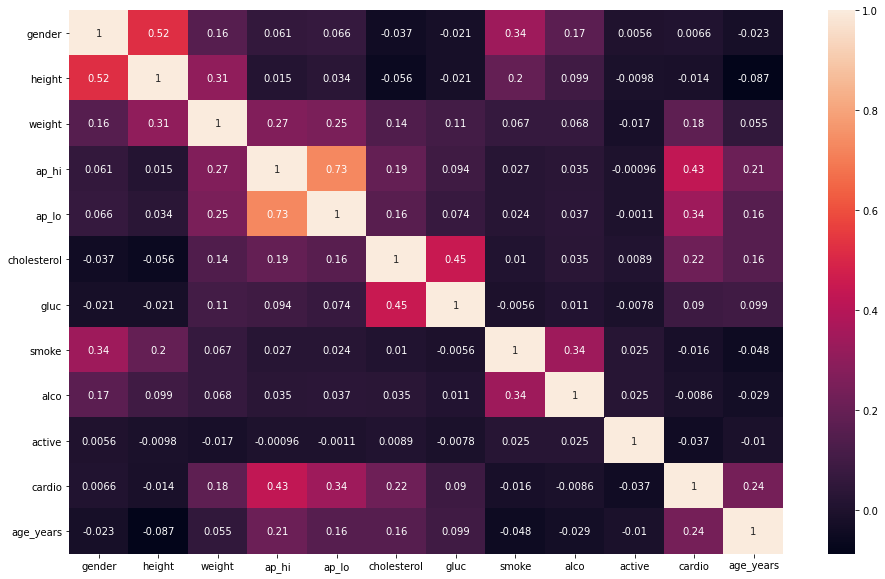

In [204]:
#heatmap - correlation matrix
plt.figure(figsize=(16, 10)) #code reference https://stackoverflow.com/questions/41519991/how-to-make-seaborn-heatmap-larger-normal-size
sns.heatmap(df.corr(), annot=True)

Firstly, this heatmap demonstrates why it is still important to run the scatterplots. We can visually determine some of the more "obvious" correlations from the scatterplots and then check how they are quantified in the heatmap. Then we have a reference for determining what the other quantified correlations could mean for variables that were difficult to see on the scatterplots. 

We can see the high correlation between systolic and diastolic blood pressures as .73 and height and weight as .31. Using these as a reference, we can identify some other modest correlations like blood pressures and age at .21 and .16 for ap_hi and ap_lo, which we were unable to discern from the scatterplots.

As far as adding categorical variables, we can see that the levels of cholesterol and glucose tend to correlate with each other, as do the behaviors of smoking and drinking. Individuals who are active don't seem to strongly be characterized by any trait in particular as all of its correlations are low.

We also get a preview of blood pressures being the highest correlated variables with *cardio*, with age and cholesterol following.

Variance Inflation factor could be preferred over pairwise scatter plots and correlation diagrams in this case because of the large number of observations and its ability to show the correlation of a variable with a group of other variables, not just the the bivariate relationship between independent variables. We can also include the coded categorical variables in this analysis and look at their VIFs relative to other categorical variables.

In [205]:
# rearrange the columns (dont need to include cardio)
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

# VIF calculations
# https://etav.github.io/python/vif_factor_python.html
def calc_vif(x):
    # calculating VIF
    vif = pd.DataFrame()
    vif['Feature'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    return(vif)

x = df.iloc[:,:-1]
calc_vif(x)

,Feature,VIF
0,age_years,61.085801
1,gender,11.825187
2,height,131.584250
3,weight,33.611146
4,ap_hi,133.510623
5,ap_lo,160.975320
6,cholesterol,6.653824
7,gluc,7.039142
8,smoke,1.367868
9,alco,1.204395


- Independent features 'Age' and 'Weight' have moderate multicollinearity.
- Independent features 'Gender', 'Cholesterol Level', 'Glucose level', 'Somke', Alcohol' and 'Active' have low multicollinearity.
- 'Height', 'systolic_Blood_Pressure' and ''diastolic_Blood_Pressure' have high VIF values; they can be predicted by other independent variables in the dataset. 

These correlations will be important later when adjusting for multicollinearity and potential overfitting in model building.

For the categorical features, we looked at counts with histograms earlier, but for comparison we can put them all on one plot to see the relative frequencies of each. Note again that for gender 1=M and 2=F, 1 is affirmative for smoking, alcohol, and active, and glucose/cholesterol have increasing levels for blood concentrations.

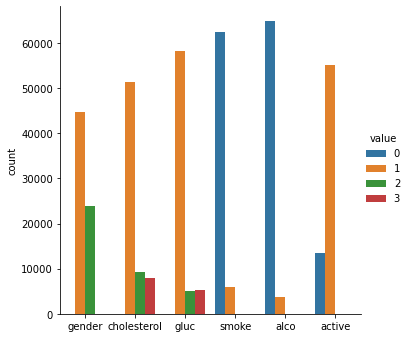

In [206]:
# Count plot for all Categorical features
# https://stackoverflow.com/questions/51211538/pandas-seaborn-countplot-from-several-columns
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=cat_features)
g = sns.catplot(x="variable", hue="value", kind="count", data=df_cat)
for ax in g.axes.flatten():
    ax.set_xlabel('')

This plot again highlights the unbalanced nature of most of these attributes, and shows that the "healthy"/"normal" characterisitics are overwhelmingly more prevalent in this data.

Vioin plots can give us a closer look at how the blood concentrations of glucose and cholesterol compare distributionally.

([<matplotlib.axis.YTick at 0x15c5f8e0>,
 [Text(0, 0.5, '0.5'), Text(0, 1.0, '1.0'), Text(0, 1.5, '1.5')])

<Figure size 1152x2160 with 0 Axes>

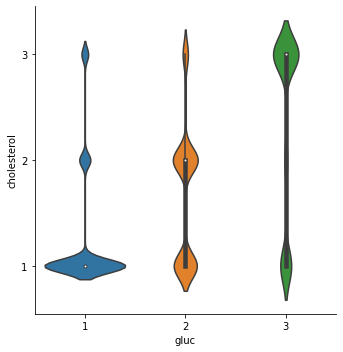

In [207]:
# Relationship between Glucose and Cholesterol
plt.figure(figsize=(16, 30))
sns.catplot(x="gluc", y="cholesterol", kind="violin", data=df);
plt.yticks([1,2,3])

The above violin plots show that at lower level of glucose, the percentage of people with high cholesterol level(3) is low. With the increase of glucose level to 3, the percentage of people having high level of cholesterol (level 3) increases significantly. 

Next we can examine characteristics and habits by gender using histograms to see relative differences.

<AxesSubplot:xlabel='gender', ylabel='count'>

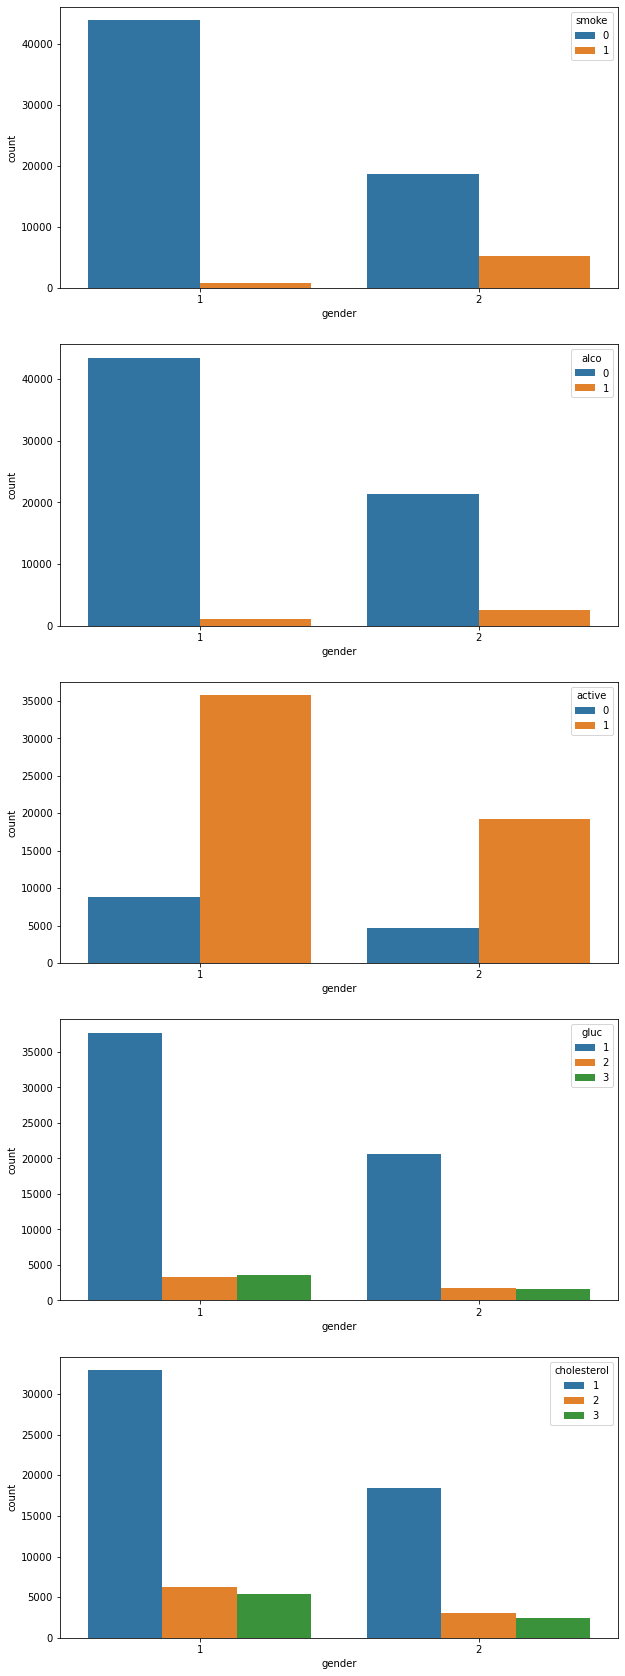

In [208]:
fig, axes = plt.subplots(5, figsize=(10,30))

sns.countplot(x='gender', data=df, ax=axes[0], hue='smoke')
sns.countplot(x='gender', data=df, ax=axes[1], hue='alco')
sns.countplot(x='gender', data=df, ax=axes[2], hue='active')
sns.countplot(x='gender', data=df, ax=axes[3], hue='gluc')
sns.countplot(x='gender', data=df, ax=axes[4], hue='cholesterol')

The most obvious difference between genders from the plots above is that there are far more smokers amoung women than men, both by count and proportionally within their gender. It is less apparent due to scale, but there also appear to be more drinkers amoung women than men. Those that consider themselves "active" are proportionately similar by gender, and the relative levels of cholesterol and glucose are similar, but it looks like there are more men with "well above normal" (3) glucose levels than "above normal" (2) as compared to women who have less individuals in each level as the levels increase.

One often cited reason for including the "alcohol" and "smoking" variables is that they can increase blood pressure. We can view this with histograms and add an age distinction as well to see if the affect remains constant over the ages of subjects.

Text(0.5, 1.0, 'BP by age group by alcohol')

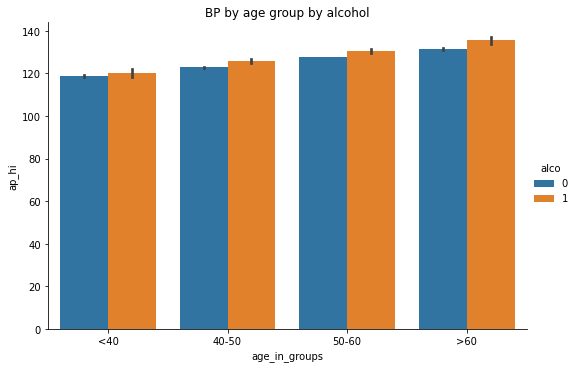

In [209]:
#create a variable that bins age
df2 = df.copy()
df2['age_in_groups'] = pd.cut(df.age_years,[0,40,50,60,80],4,labels=['<40','40-50','50-60','>60']) # this creates a new variable
df2['age_in_groups'].describe()

#plot ages vs blood pressure by alco
g2 = sns.factorplot(x='age_in_groups', y='ap_hi',hue='alco',
                   data=df2, kind='bar',
                    aspect=1.5)
g2.ax.set_title('BP by age group by alcohol')

Text(0.5, 1.0, 'BP by age group by smoke')

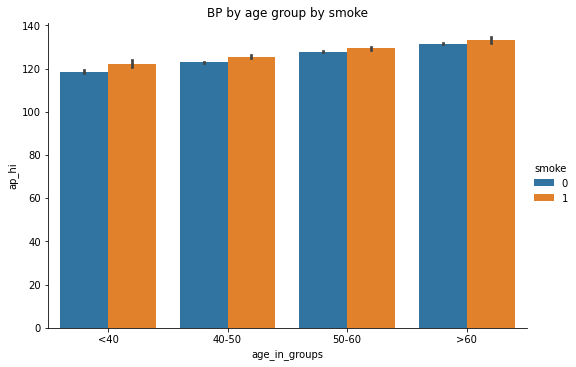

In [210]:
#plot ages vs blood pressure by alco
g2 = sns.factorplot(x='age_in_groups', y='ap_hi',hue='smoke',
                   data=df2, kind='bar',
                    aspect=1.5)
g2.ax.set_title('BP by age group by smoke')

Both behaviors exhibited an increased blood pressure for all of the age groups created, and the histograms also again demonstrated the increase in blood pressure with age.

Conversely, if we look at the *active* attribute, we might see the opposite affect.

Text(0.5, 1.0, 'BP by age group by active')

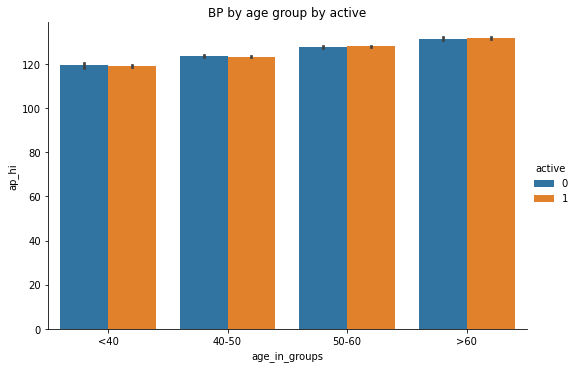

In [211]:
#plot ages vs blood pressure by alco
g2 = sns.factorplot(x='age_in_groups', y='ap_hi',hue='active',
                   data=df2, kind='bar',
                    aspect=1.5)
g2.ax.set_title('BP by age group by active')

The age distinction shows here more readily as the very slight difference in blood pressure is actually lower for younger groups but higher for older, which could have some interesting implications on how activity affects blood pressure in older vs younger individuals.

### Exploring Relationships of Attributes with the Target Variable

Lastly, we can begin to examine the relationships between the predictor attributes and the target variable *cardio* - CVD diagnosis.

We can use frequency plots, box plots, and violin plots to visually compare distributions of each attribute when separated by *cardio*, starting with the features that showed the most separation on the pairwise plots earlier.

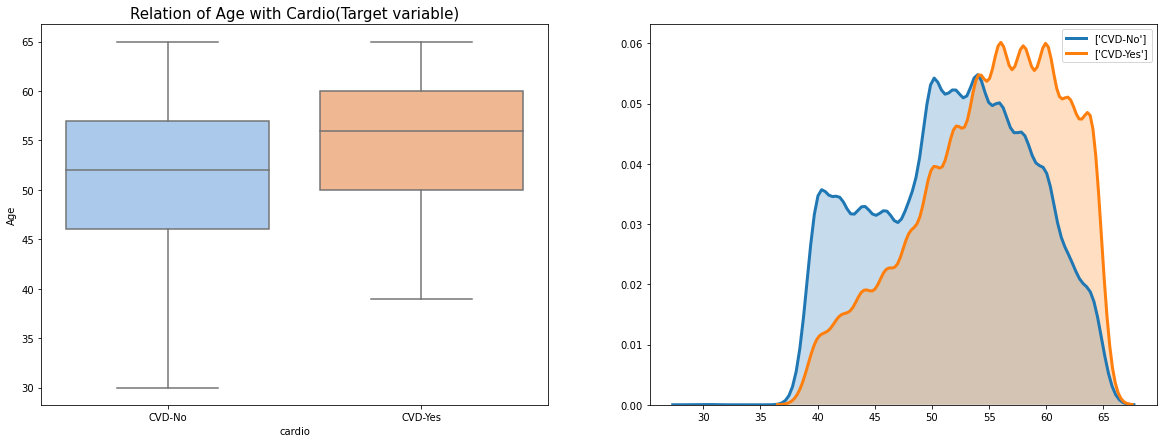

In [212]:
# Age vs Cardio
plt.rcParams['figure.figsize'] = (20, 7)
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='age_years',data=df,palette='pastel')
plt.title('Relation of Age with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('Age')

plt.subplot(1,2,2)

disease_d = df[df['cardio'] == 1]['age_years']
non_disease_d = df[df['cardio'] == 0]['age_years']

sns.distplot([non_disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-No'])

sns.distplot([disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-Yes'])

plt.show()

There is  clear separation in distributions between positive and negative diagnosis for CVD by age. The median age on the box plot for a positive diagnosis looks about 4-5 years higher than for subjects without CVD.

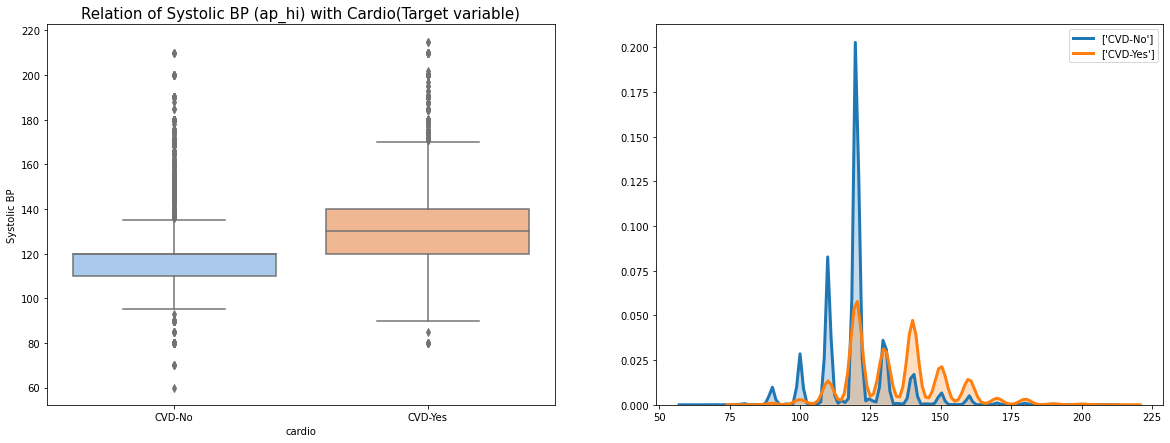

In [213]:
# ap_hi (systolic bp) vs Cardio
plt.rcParams['figure.figsize'] = (20, 7)
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='ap_hi',data=df,palette='pastel')
plt.title('Relation of Systolic BP (ap_hi) with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('Systolic BP')

plt.subplot(1,2,2)

disease_d = df[df['cardio'] == 1]['ap_hi']
non_disease_d = df[df['cardio'] == 0]['ap_hi']

sns.distplot([non_disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-No'])

sns.distplot([disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-Yes'])

plt.show()

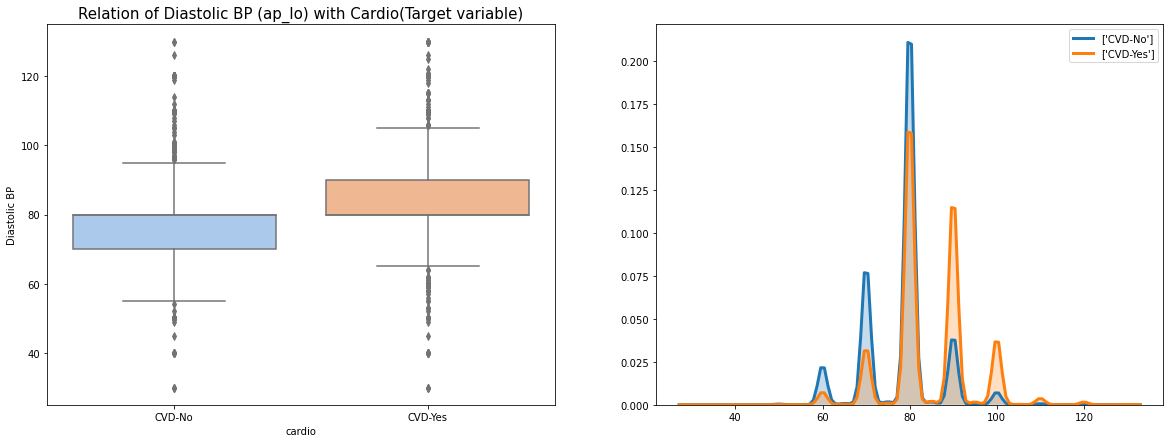

In [214]:
# ap_lo (diastolic bp) vs Cardio
plt.rcParams['figure.figsize'] = (20, 7)
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='ap_lo',data=df,palette='pastel')
plt.title('Relation of Diastolic BP (ap_lo) with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('Diastolic BP')

plt.subplot(1,2,2)

disease_d = df[df['cardio'] == 1]['ap_lo']
non_disease_d = df[df['cardio'] == 0]['ap_lo']

sns.distplot([non_disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-No'])

sns.distplot([disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-Yes'])

plt.show()

Perhaps the most telling separation is seen in blood pressures. For both systolic and diastolic pressure, the distribution of positive cases is shifted greatly toward higher blood pressures for positive diagnoses.

Because of the unique multi-modal distributions of the blood pressures, violin plots will be useful here to see where the differences are.

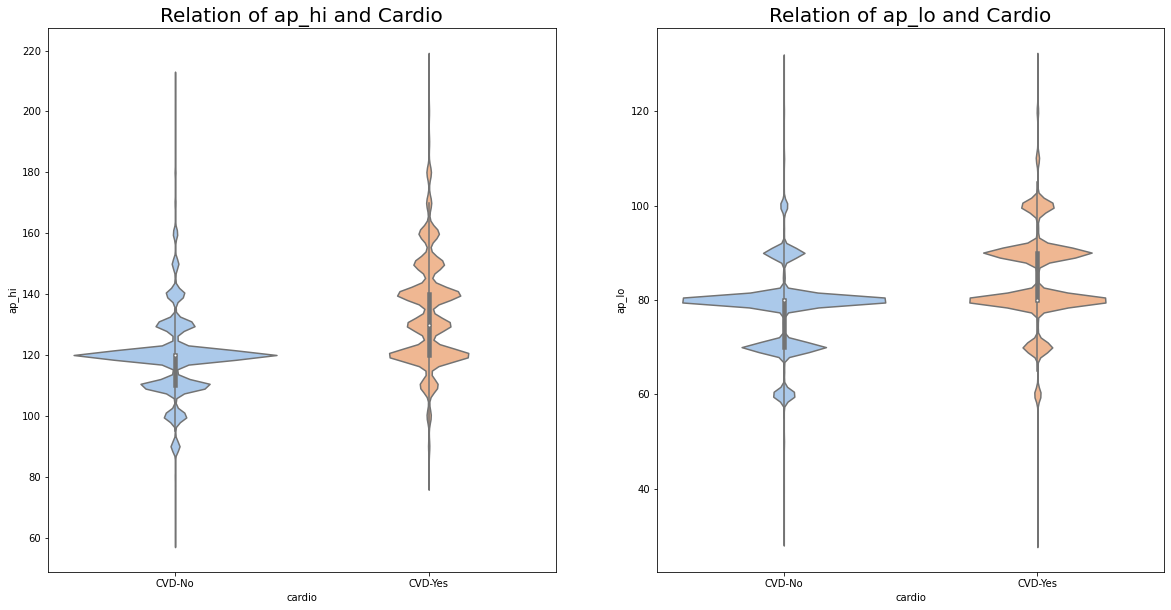

In [215]:
# Violin plot to see any pattern between BP and Cardio 

plt.rcParams['figure.figsize'] = (20,10)
plt.subplot(1,2,1)
sns.violinplot(df['cardio'], df['ap_hi'], palette = 'pastel', size = 10)
plt.title('Relation of ap_hi and Cardio', fontsize = 20, fontweight = 30)
plt.xticks([0,1],  ['CVD-No','CVD-Yes'])
plt.ylabel('ap_hi')

plt.subplot(1,2,2)
sns.violinplot(df['cardio'], df['ap_lo'], palette = 'pastel', size = 10)
plt.title('Relation of ap_lo and Cardio', fontsize = 20, fontweight = 30)
plt.xticks([0,1],  ['CVD-No','CVD-Yes'])
plt.ylabel('ap_lo')

plt.show()

The violin plots illustrate with the wide peaks at blood pressures considered healthy for negative diagnosis that most individuals that maintain these healthy levels will not have CVD. It is important to note however that most positive diagnoses are also in this "normal" blood pressure range for both systolic and diastolic pressure measurements, indicating that there are other important factors involved.

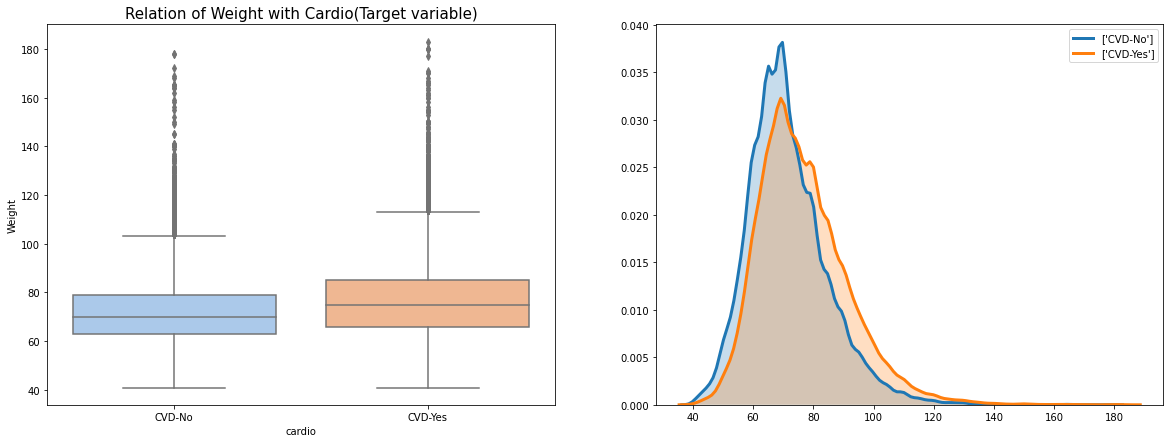

In [216]:
# Weight vs Cardio
plt.rcParams['figure.figsize'] = (20, 7)
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='weight',data=df,palette='pastel')
plt.title('Relation of Weight with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('Weight')

plt.subplot(1,2,2)

disease_d = df[df['cardio'] == 1]['weight']
non_disease_d = df[df['cardio'] == 0]['weight']

sns.distplot([non_disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-No'])

sns.distplot([disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-Yes'])

plt.show()

The distribution is also shifted toward a positive diagnosis for higher weights, although the difference does not appear to be large. Weight probably needs to be qualified with height (a metric like BMI) to be more meaningful.

A scatter plot with a regression line for each of the blood pressure variables can show how they similarly affect *cardio* and again how they the two BP measurements are closely related to each other.

<Figure size 720x720 with 0 Axes>

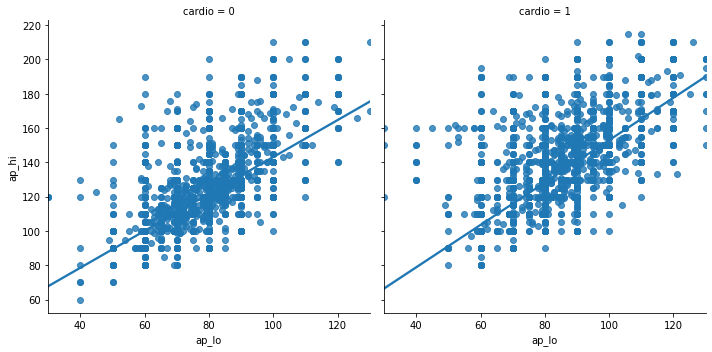

In [217]:
# lets examine how the  'systolic_Blood_Pressure' and 'diastolic_Blood_Pressure' are related
plt.figure(figsize=(10,10))
sns.lmplot(x='ap_lo',y='ap_hi',data=df,col='cardio')

The similarity of the regression lines show us that the positive relationship between systolic and diastolic pressure does not change much for subjects with or without CVD.

For comparison of categorical attributes we can again go back to our histograms, but this time split them by *cardio* to see how the counts change depending on a CVD diagnosis.

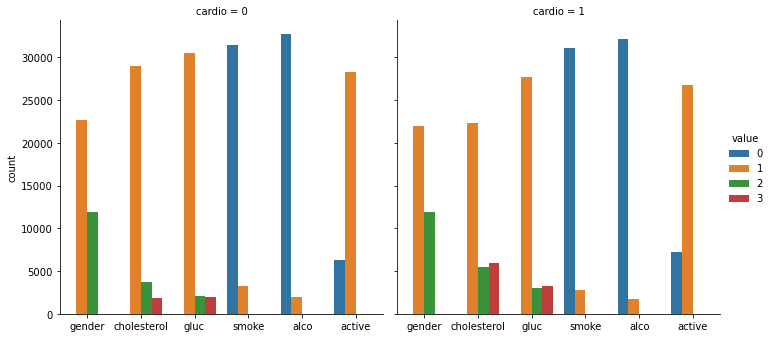

In [218]:
# Count plot for all Categorical features with respect to Cardio
g = sns.catplot(x="variable", hue="value", col="cardio", kind="count", data=df_cat)
for ax in g.axes.flatten():
    ax.set_xlabel('')

We can see that greater counts of higher glucose and cholesterol levels are associated with CVD, but interestingly, there are fewer smokers with CVD, and alcohol could be slightly lower as well. There are also less active individuals on the CVD side.

We also earlier looked at how the blood concentrations of glucose and cholesterol compare distributionally with violin plots. We can split those by *cardio* to how they change depending on CVD.

([<matplotlib.axis.YTick at 0x18f204f0>,
 [Text(0, 0.0, '0.0'), Text(0, 0.5, '0.5'), Text(0, 1.0, '1.0')])

<Figure size 1152x2160 with 0 Axes>

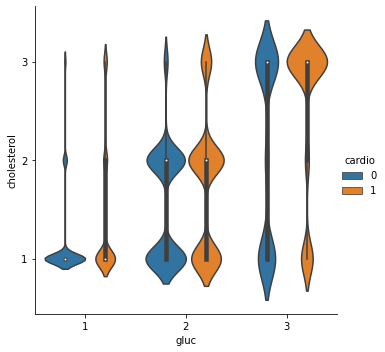

In [219]:
# Relationship between Glucose and Cholesterol with respect to Cardio
plt.figure(figsize=(16, 30))
sns.catplot(x="gluc", y="cholesterol", kind="violin", hue='cardio', data=df);
plt.yticks([1,2,3])

### Additional Desired Features

Other features like "Waist circumference", "Truncal obesity" and "Family History” play a key role in cardiovacular disease. If we had access to these we could greatly increase prediction power.

- Waist circumference: If most of your fat is around your waist rather than at your hips, you're at a higher risk for heart disease. This risk goes up with a waist size that is greater than 35 inches for women or greater than 40 inches for men

- Family History: Family history of CVD modifies future CVD risk depending on the number and age of affected first-degree relatives. Siblings of patients with CVD have about a 40% risk increase, while offspring of parents with premature CVD have a 60% to 75% risk increase

- Truncal obesity: Also known as central obesity and truncal obesity, is a condition when excessive abdominal fat around the stomach and abdomen has built up to the extent that it is likely to have an increased risk of developing cardiovascular disease (CVD), particularly heart failure (HF) and coronary heart disease (CHD)

- Stress: This would be another subjective categorical metric that is often linked to heart conditinos.

- Time: If we had the time of diagnosis, we could also evaluate effects over time. Disease progression is an important element in medical practice.



- *BMI*: Body Mass Index

BMI is a common, but often cited as unreliable, tool for determining obesity. It can be easily created from the data we have. It is a ratio of weight (in kilograms) and height (in meters squared). A BMI over 30 is considered overweight, and over 40 is obese.

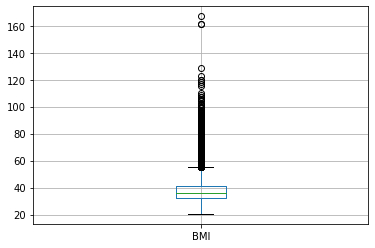

In [220]:
# BMI = weight in kgs / height in m^2
df2['BMI'] = df['weight'] / (df['height'] / 100).round()

#graph box plot
plt.figure(figsize=(6, 4))
boxplot = df2.boxplot(column=['BMI'])

BMI is used as a flag for cardiovascular disease risk. By including it we can evaluate its utility. We can explore its effects and perhaps the extent of its validity when we start building models. We alluded earlier to how the weight distribution showed little change for subjects diagnosed with CVD but needed to be qualified with height. We can use the violin/box plots again to whow how the BMI metric changes with *cardio*. 

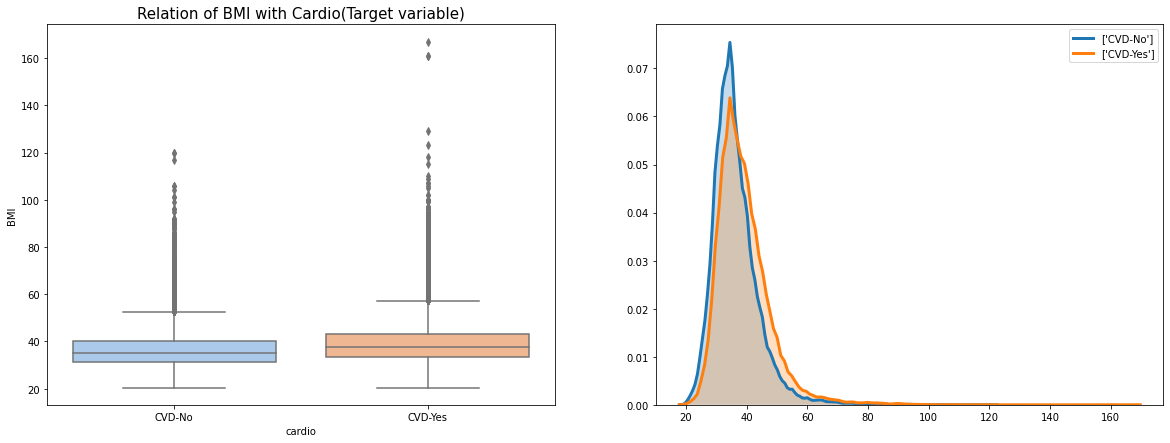

In [221]:
# Weight vs Cardio
plt.rcParams['figure.figsize'] = (20, 7)
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='BMI',data=df2,palette='pastel')
plt.title('Relation of BMI with Cardio(Target variable)', fontsize = 15)
plt.xticks([0,1], ['CVD-No','CVD-Yes'])
plt.ylabel('BMI')

plt.subplot(1,2,2)

disease_d = df2[df2['cardio'] == 1]['BMI']
non_disease_d = df2[df2['cardio'] == 0]['BMI']

sns.distplot([non_disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-No'])

sns.distplot([disease_d], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, label = ['CVD-Yes'])

plt.show()

It is difficult to see due to scale, but the distribution does shift toward higher BMI with a CVD diagnosis. The fact that the shift appears fairly small could be an indication that its criticisms have some merit, but we will get a better idea when we start modeling.

### *Exceptional Work*

#### Using PCA to Reduce the Dimensions

Principal Component Analysis (PCA) is a dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It preserves the essential parts that have more variation of the data and remove the non-essential parts with fewer variation. This dataset does not have a huge number of variables, but it is worth discovering what PCA could do with them.

In [222]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# normalize the data by feature scaling 0 - 1
features = ["age_years", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]

# Independent features
x = df.loc[:, features].values
# dependent feature
y = df.loc[:, ['cardio']].values

scaled_df = StandardScaler().fit_transform(x)

In [223]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_df)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.20135494 0.17139575 0.11788611 0.10075823 0.08990077 0.08176659
 0.06946264 0.05615296 0.04876843 0.03834309 0.02421047]


In [224]:
# get cumulative sum of variance for principal components
cumsum_var = np.cumsum(explained_variance,axis=0) 

Text(6.799999999999997, 0.5, 'Variance')

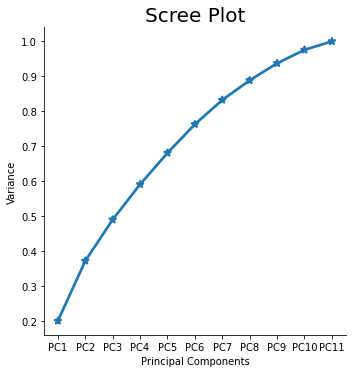

In [225]:
# Scree plot
df_PCA = pd.DataFrame({'var':cumsum_var,
             'PC':['PC1','PC2','PC3','PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']})

sns.catplot(x="PC", y="var",kind="point", data=df_PCA, markers=["*"], linestyles=["-"])
plt.title('Scree Plot', fontsize = 20, fontweight = 30)
plt.xlabel('Principal Components')
plt.ylabel('Variance')

The above scree plot suggests that 8 principal Components explains 88.7 percentage variance in the data 

In [226]:
# lets visualize how first two principal Components will separate cardio
pca_2 = PCA(n_components=2)
principalComponents_2 = pca_2.fit_transform(scaled_df)
explained_variance_2 = pca_2.explained_variance_ratio_
print(explained_variance_2)

[0.20135494 0.17139575]


<Figure size 720x720 with 0 Axes>

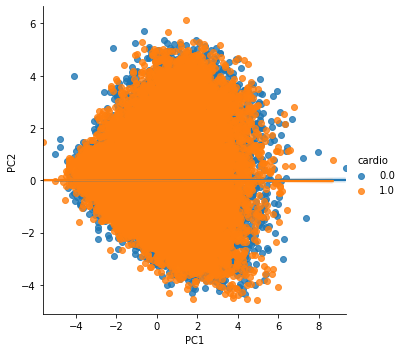

In [227]:
pc_df = pd.DataFrame(data = principalComponents_2 , 
        columns = ['PC1','PC2'])
pc_df['cardio'] = df[['cardio']]
pc_df
plt.figure(figsize = (10,10))
sns.lmplot( x='PC1', y='PC2', data=pc_df,  hue='cardio')  


As we know first two principal components explains only 37.2% variation, didn't give us good separation on *cardio* states. 

#### Recursive feature Elimination

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 

In [228]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
# recursive Feature elimination to identify important features
features = ["age_years", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]

# Independent features
x = df.loc[:, features].values
# dependent feature
y = df.loc[:, ['cardio']].values

# Instance of Random Forest Classifier
rfc = RandomForestClassifier(random_state=1234)

# Instance of Recursive Feature Elimination
rfe = RFE(estimator=rfc, n_features_to_select=5, step=1)

# Fit RFE
rfe.fit(x, y)

RFE(estimator=RandomForestClassifier(random_state=1234), n_features_to_select=5)

In [229]:
# get column names
columns = pd.DataFrame(list(df.columns)[:-1])

# Get the ranking of features
ranking = pd.DataFrame(rfe.ranking_)

# ranking and their importance
rfe_selected = pd.DataFrame()
rfe_selected  = pd.concat([columns, ranking], axis=1)
rfe_selected.columns = ['Feature Name', 'Ranking']
print(rfe_selected)

   Feature Name  Ranking
0     age_years        1
1        gender        4
2        height        1
3        weight        1
4         ap_hi        1
5         ap_lo        1
6   cholesterol        2
7          gluc        3
8         smoke        6
9          alco        7
10       active        5


Recursive feature elimination method selected "Age_years", "Height", "Weight", "systolic_Blood_Pressure" and "diastolic_Blood_Pressure" as top five features in predicting whether patients have CVD or not.